In [26]:
#TJ import needed packages
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy.units as u
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt

In [2]:
#Python task #1 transformations
example_RA = 120.5 * u.deg   #TJ assign random Right Ascension in degrees
example_dec = -35.2 * u.deg  # TJ assign random Declination in degrees
c = SkyCoord(ra=example_RA, dec=example_dec)

# Convert to Cartesian
c.representation_type = 'cartesian'
x, y, z = c.x, c.y, c.z
man_x, man_y, man_z = [np.cos(example_RA)*np.cos(example_dec), np.sin(example_RA)*np.cos(example_dec), np.sin(example_dec)]

# Print results
print(f"astropy transformed coordinates: x = {x}, y = {y}, z = {z}")
print(f"manually converted coordinates: x = {man_x}, y = {man_y}, z = {man_z}")

astropy transformed coordinates: x = -0.4147323840027023, y = 0.7040758727115727, z = -0.5764323161697933
manually converted coordinates: x = -0.4147323840027023, y = 0.7040758727115727, z = -0.5764323161697933


In [7]:
#Python task #2 galactic center
SagA_RA = "17h45m40.04s" #TJ Right Ascension of SagA* in hr, min, sec
SagA_Dec = "-29d00m28.1s" #TJ Declination of SagA* at J2000.0 epoch in deg, min, sec
SagA_loc = SkyCoord(SagA_RA, SagA_Dec, equinox='J2000.0', unit=(u.hourangle, u.deg))

#TJ Print the result
print(f'Galactic center location: {SagA_loc}')
#TJ The center of the galaxy is technically in Sagitarius constellation, but it is a noticible distance outside of 
#   the constellation border, definitely NOT near the center of it.


Galactic center location: <SkyCoord (ICRS): (ra, dec) in deg
    (266.41683333, -29.00780556)>


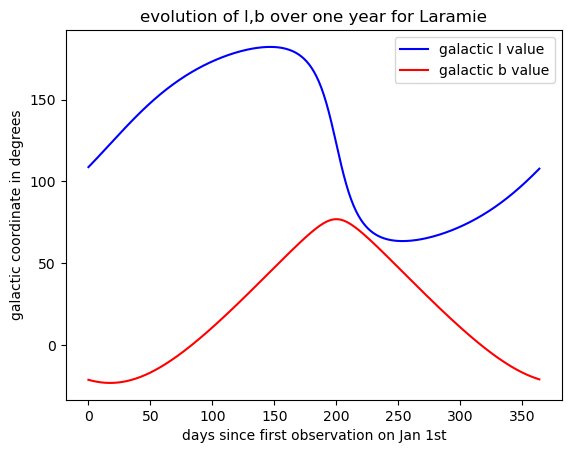

In [31]:
#Python task #3 how does l and b change thorughout the year in Laramie
latitude = 40 *u.deg   #TJ approximate latitude of Laramie in degrees
longitude = (-105)*u.deg  #TJ approximate longitude of Laramie in degrees
Laramie_location = EarthLocation.from_geodetic(lat=latitude, lon=longitude, height = 0*u.m) #TJ set Laramie location, height is irrelevent for zenith locations
utcoffset = -7 * u.hour  #TJ define offset from UTC to Mountain time
l_array = [] #TJ initialize l and b arrays
b_array = []
for day in range(0,365):
    #TJ set first observation at midnight Jan 1st, every subsequent observation is made 24 hours later (note this puts us off by 6 hours after the year is over)
    Observation_time = Time(f"2025-01-01 07:00:00") + utcoffset + day*24*u.hour
    #TJ set alt/az to be the zenith, time and location defined above
    altaz = SkyCoord(alt=90*u.deg, az=0*u.deg, frame=AltAz(obstime=Observation_time, location=Laramie_location))
    icrs_coord = altaz.transform_to('icrs') #TJ transform into an intertial reference frame
    galactic_coord = icrs_coord.transform_to('galactic')
    l_array.append(galactic_coord.l.deg)
    b_array.append(galactic_coord.b.deg)
xrange = range(0,365) #TJ establish x-axis range
#TJ plot results
plt.plot(xrange, l_array, color = 'blue', label = 'galactic l value')
plt.plot(xrange, b_array, color = 'red', label = 'galactic b value')
plt.xlabel('days since first observation on Jan 1st')
plt.ylabel('galactic coordinate in degrees')
plt.title('evolution of l,b over one year for Laramie')
plt.legend()
plt.show()
